In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Dense

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape , y_test_raw.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train     = keras.utils.to_categorical(y_train_raw, num_classes)
y_test      = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


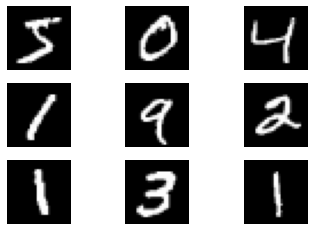

In [4]:
#Display the data
plt.figure()

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i], cmap='gray')
  plt.axis('off')

plt.show()

In [5]:
#Preprocess the data
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(-1, 784)
x_test = x_test_raw.reshape(-1, 784)

#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255


In [6]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = Sequential()
model.add(Dense(512, activation='relu', input_dim = 784))
model.add(Dense(256, activation='relu'))
model.add(Dense(124, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(0.001), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Fit the training data to the model by using the fit method.
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)


Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2283 - accuracy: 0.9329
Epoch 2/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0856 - accuracy: 0.9734
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0540 - accuracy: 0.9827
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0400 - accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0312 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0180 - accuracy: 0.9942
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0155 - accu

In [8]:
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07551394402980804
Test accuracy: 0.9818999767303467
